In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
#Leemos el dataset
df = pd.read_csv('Crop_recommendation.csv')


In [17]:
#Información
df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
 8   Colores      2200 non-null   object  
dtypes: category(1), float64(4), int64(3), object(1)
memory usage: 140.5+ KB


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


No observamos valores nulos

In [9]:
# Utiliza seaborn para generar una paleta de colores única basada en los valores únicos en la columna 'Datos'
palette = sns.color_palette('husl', n_colors=len(df['label'].unique()))

# Crea un diccionario que asigne valores únicos a colores de la paleta
color_dict = dict(zip(df['label'].unique(), palette))

# Aplica el mapeo de colores a la columna 'Datos' para crear la nueva columna 'Colores'
df['Colores'] = df['label'].map(color_dict)

In [11]:
df['label']=df['label'].astype('category')

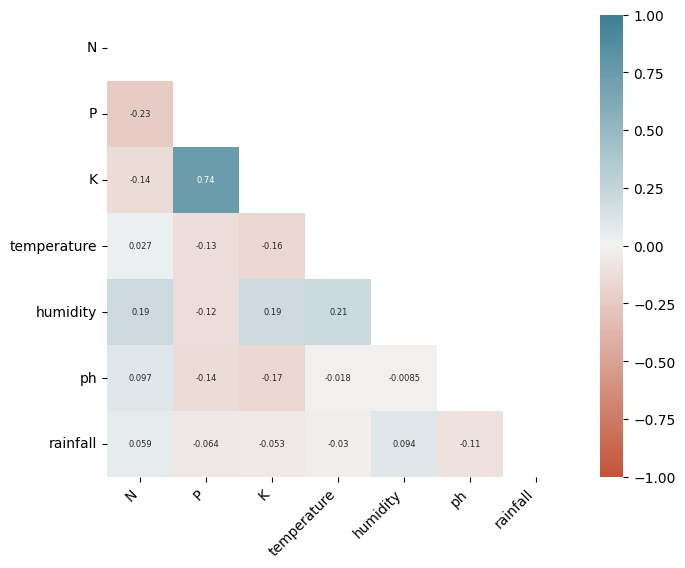

In [24]:
corr = df.drop(['label',"Colores"], axis=1).corr()
#corr = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8, 6))

ax = sns.heatmap(
    corr,
    mask = mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6},
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

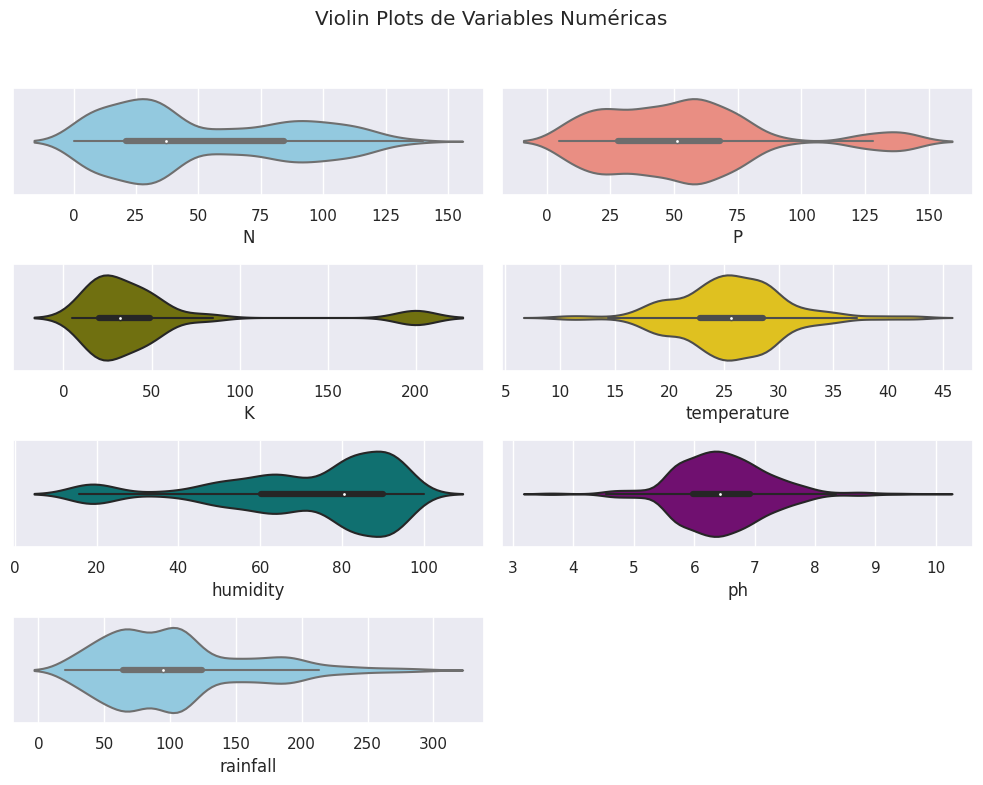

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Obtiene una lista de todas las columnas numéricas del DataFrame
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Calcula el número de filas y columnas necesarias para el ploteo
num_rows = (len(numeric_columns) + 1) // 2
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Colores distintos para los violin plots
colors = ["skyblue", "salmon", "olive", "gold", "teal", "purple"]

# Itera a través de las columnas numéricas y crea un violin plot para cada una
for i, col in enumerate(numeric_columns):
    row = i // num_cols
    col_idx = i % num_cols
    
    # Selecciona un color diferente para cada violin plot
    color_idx = i % len(colors)
    color = colors[color_idx]
    
    sns.violinplot(data=df, x=col, color=color, ax=axs[row, col_idx])
    
    # Configura el título debajo del gráfico
    #axs[row, col_idx].set_title(col)
    #axs[row, col_idx].set_xlabel(col)

# Elimina cualquier subplot no utilizado
for i in range(len(numeric_columns), num_rows * num_cols):
    row = i // num_cols
    col_idx = i % num_cols
    fig.delaxes(axs[row, col_idx])

# Añade un título general a la figura
plt.suptitle("Violin Plots de Variables Numéricas")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
plt.show()


In [39]:
# 1. Agrupar por tipo de grano de cultivo
grupos = df.groupby('label')

In [40]:
# 2. Calcular estadísticas descriptivas
for nombre, grupo in grupos:
    print(f"Estadísticas para el grupo '{nombre}':")
    print(grupo.describe())

Estadísticas para el grupo 'apple':
                N           P           K  temperature    humidity  \
count  100.000000  100.000000  100.000000   100.000000  100.000000   
mean    20.800000  134.220000  199.890000    22.630942   92.333383   
std     11.863704    8.139665    3.320871     0.827404    1.458551   
min      0.000000  120.000000  195.000000    21.036527   90.025751   
25%     10.000000  126.750000  197.000000    22.163206   90.970127   
50%     24.000000  136.500000  200.000000    22.628290   92.416541   
75%     30.000000  141.000000  203.000000    23.344066   93.509252   
max     40.000000  145.000000  205.000000    23.996862   94.920481   

               ph    rainfall  
count  100.000000  100.000000  
mean     5.929663  112.654779  
std      0.268932    7.102985  
min      5.514253  100.117344  
25%      5.705800  106.070135  
50%      5.885818  112.979230  
75%      6.135616  118.449546  
max      6.499227  124.983162  
Estadísticas para el grupo 'banana':
        

Valores atípicos para el grupo 'apple':
No tiene outliers


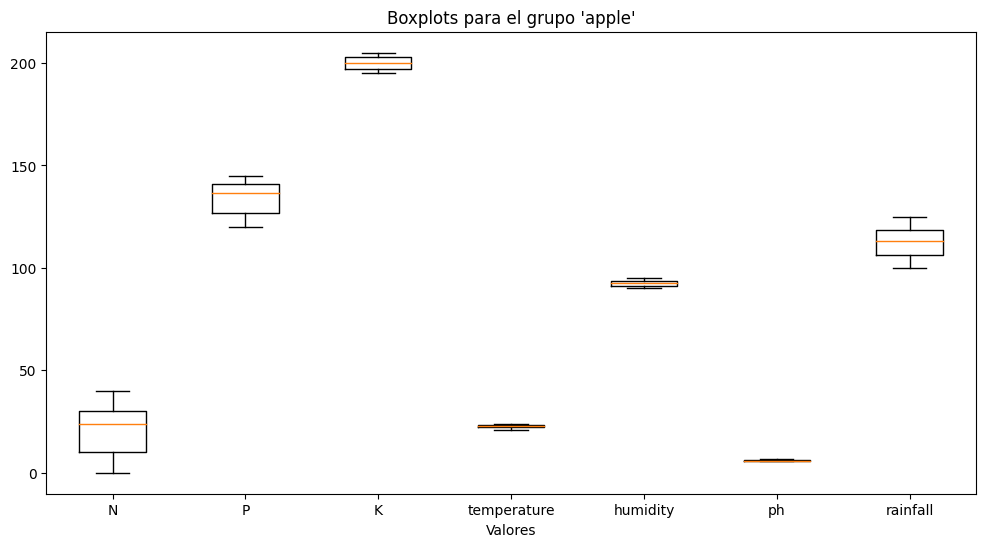

Valores atípicos para el grupo 'banana':
No tiene outliers


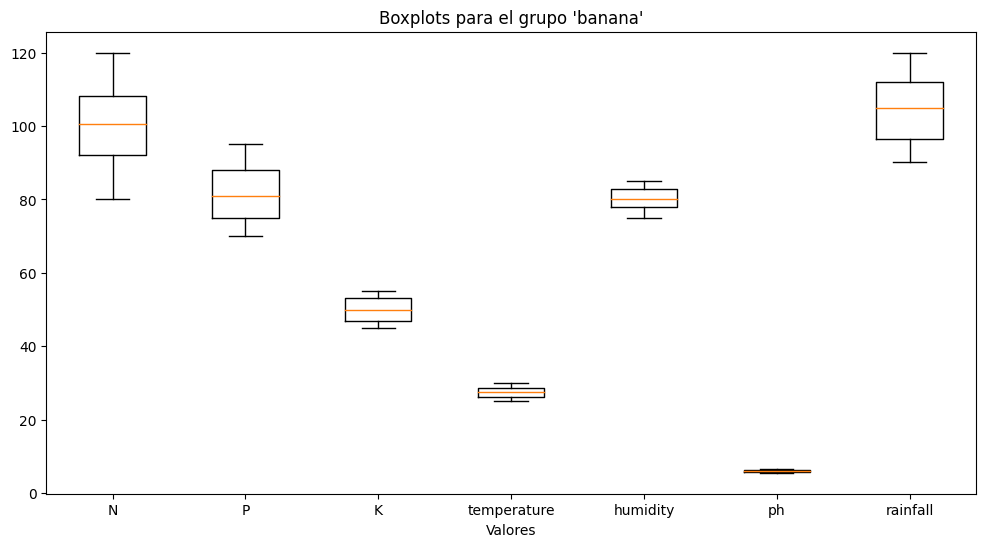

Valores atípicos para el grupo 'blackgram':
No tiene outliers


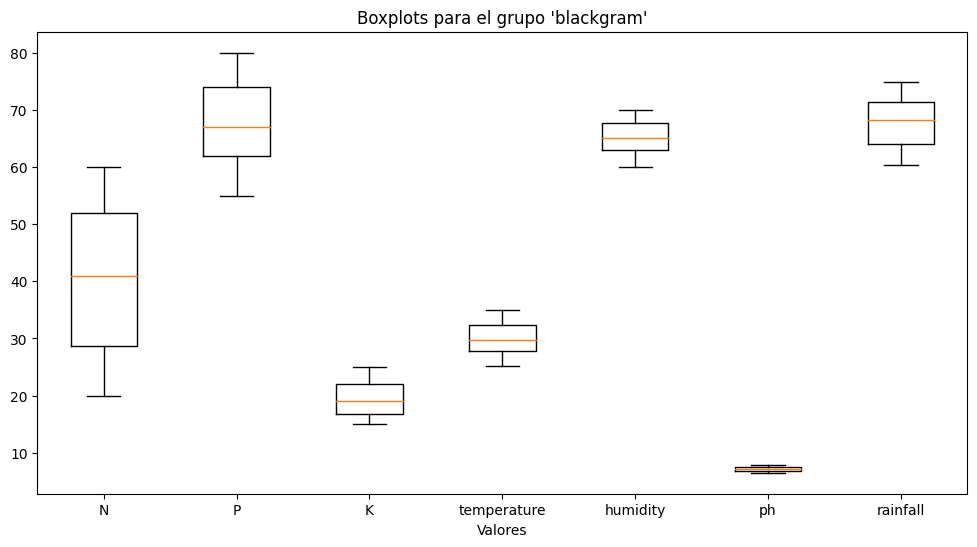

Valores atípicos para el grupo 'chickpea':
No tiene outliers


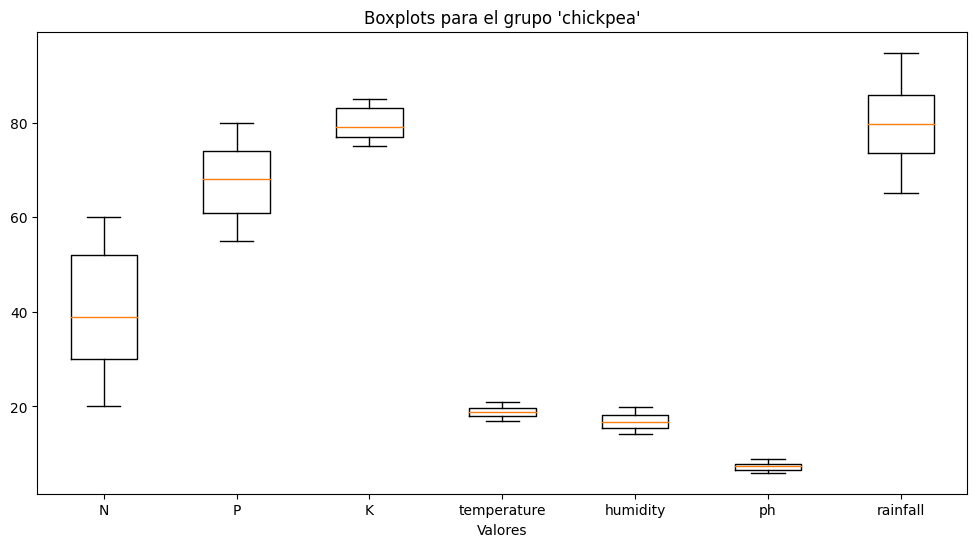

Valores atípicos para el grupo 'coconut':
No tiene outliers


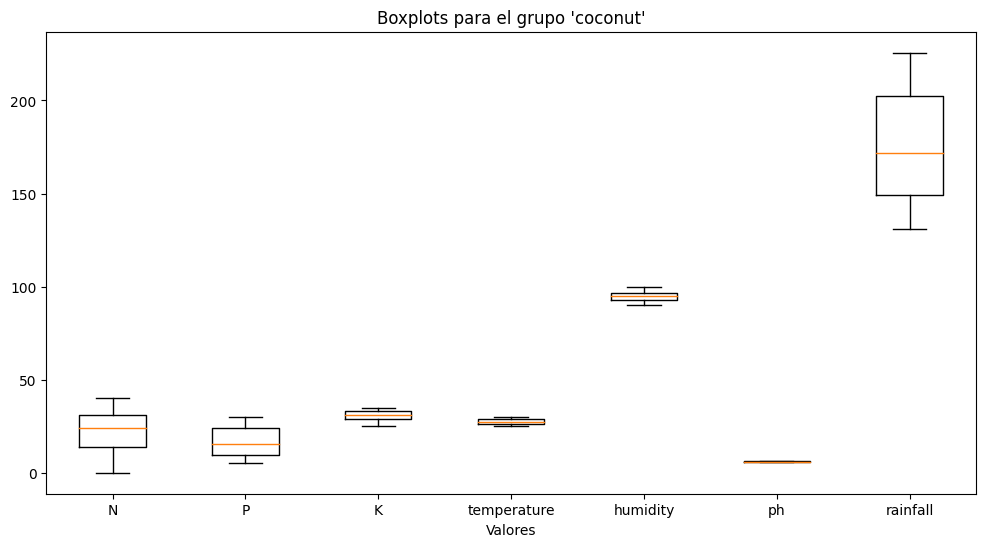

Valores atípicos para el grupo 'coffee':
No tiene outliers


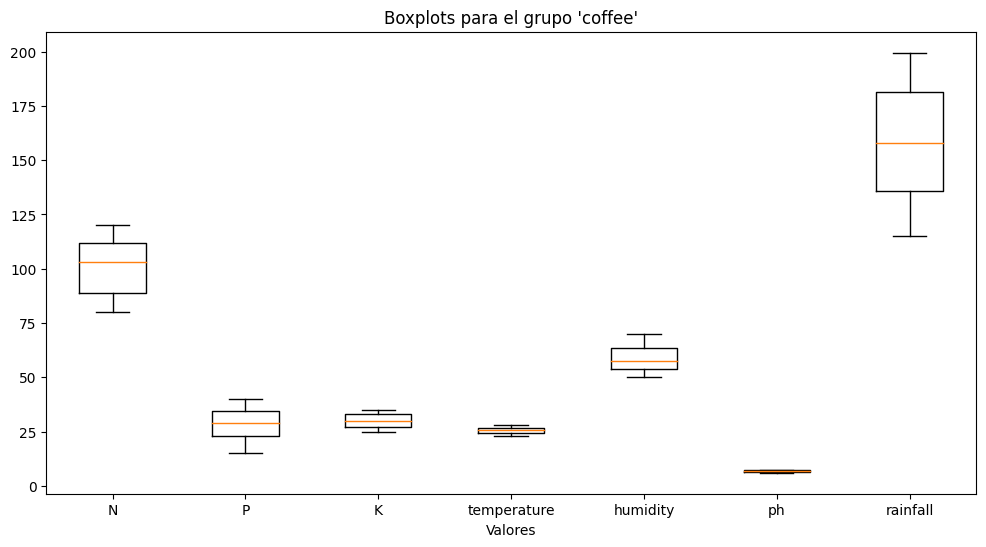

Valores atípicos para el grupo 'cotton':
No tiene outliers


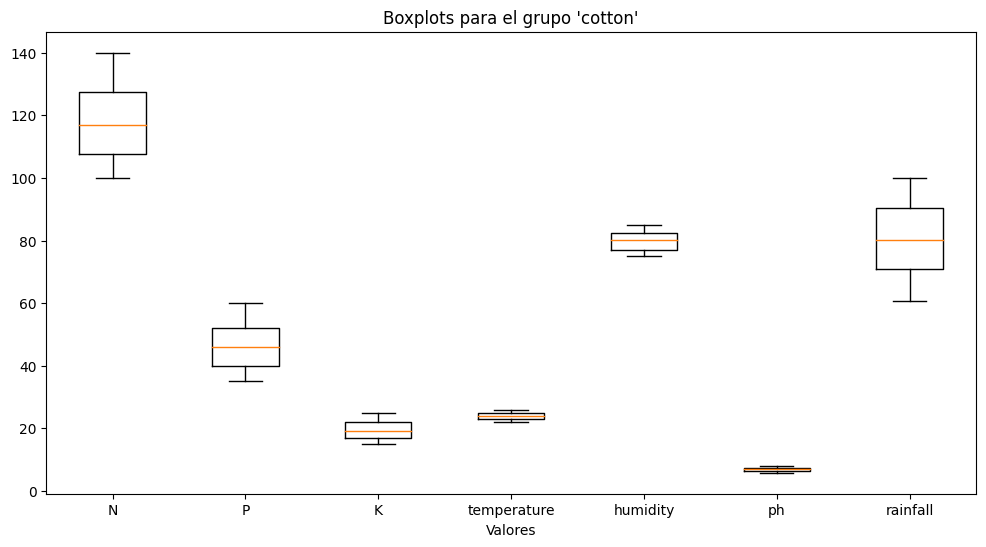

Valores atípicos para el grupo 'grapes':
No tiene outliers


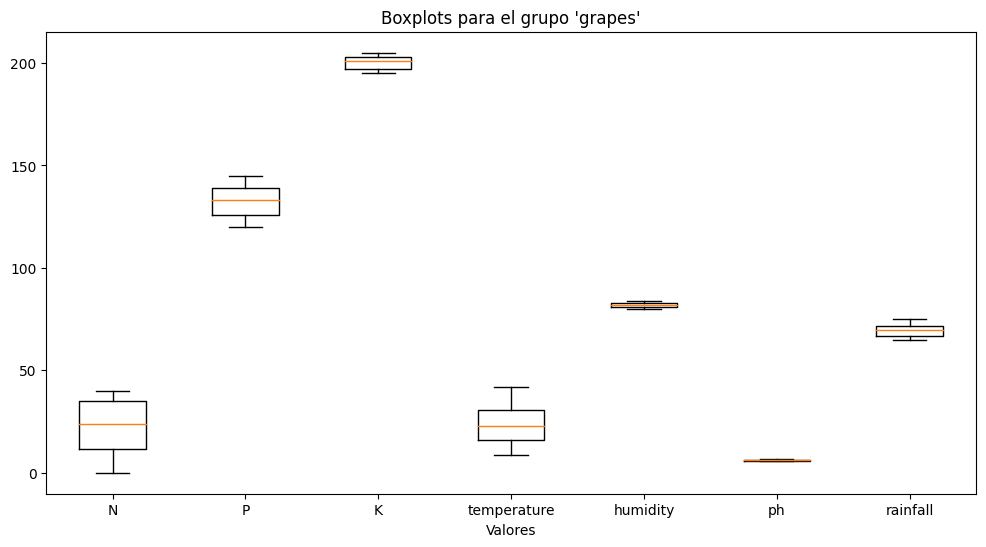

Valores atípicos para el grupo 'jute':
No tiene outliers


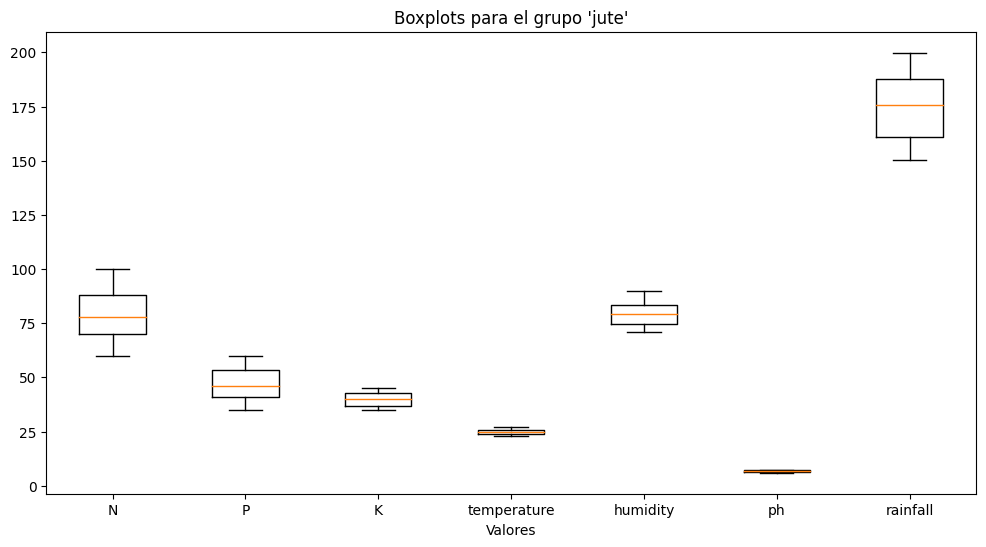

Valores atípicos para el grupo 'kidneybeans':
No tiene outliers


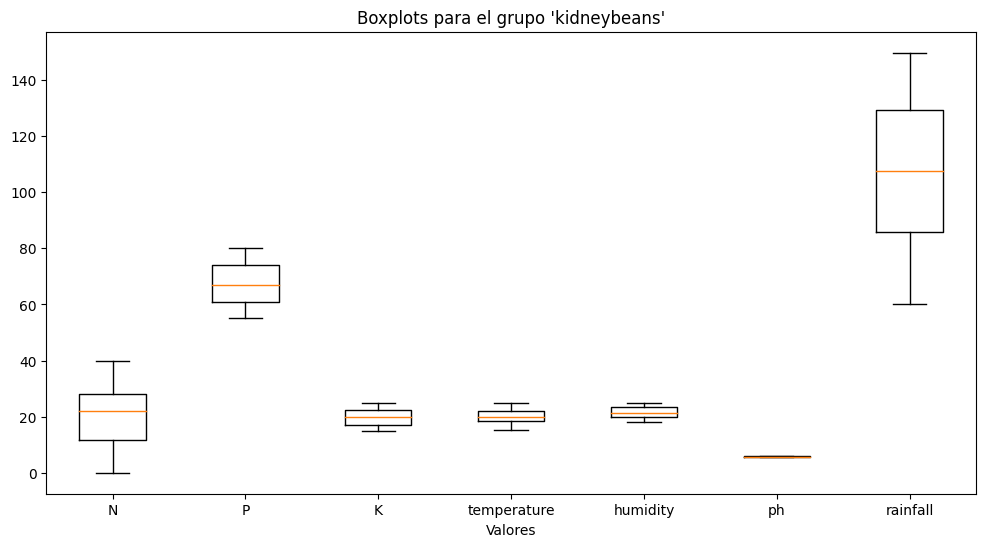

Valores atípicos para el grupo 'lentil':
No tiene outliers


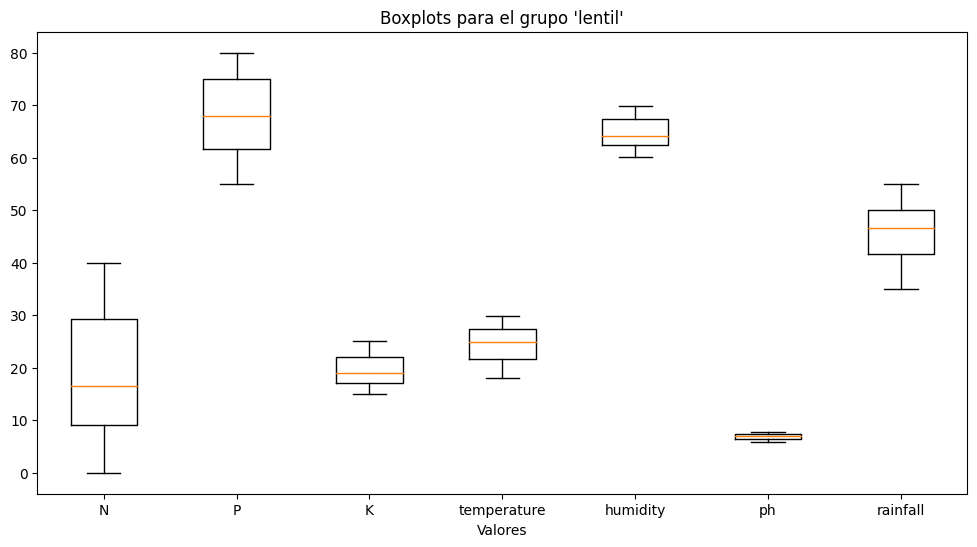

Valores atípicos para el grupo 'maize':
No tiene outliers


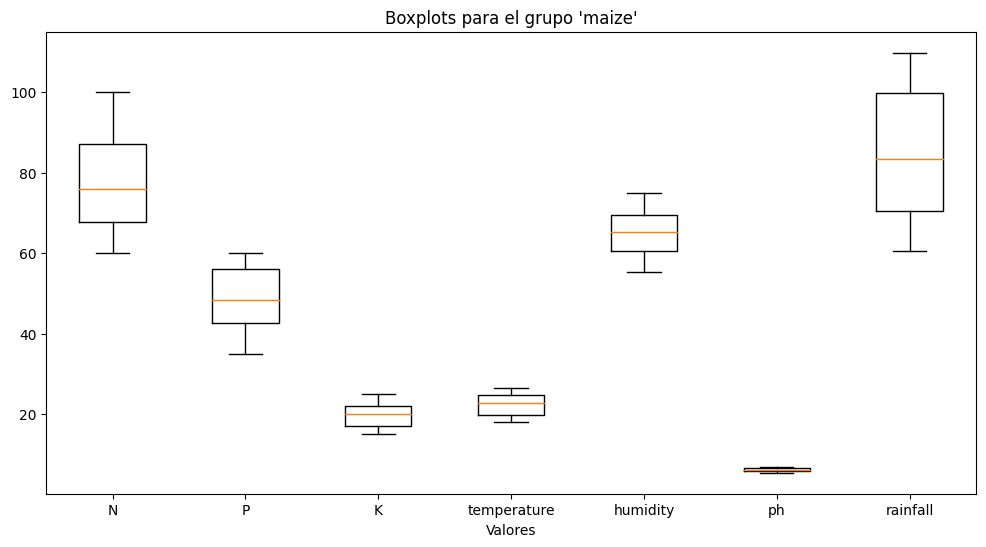

Valores atípicos para el grupo 'mango':
No tiene outliers


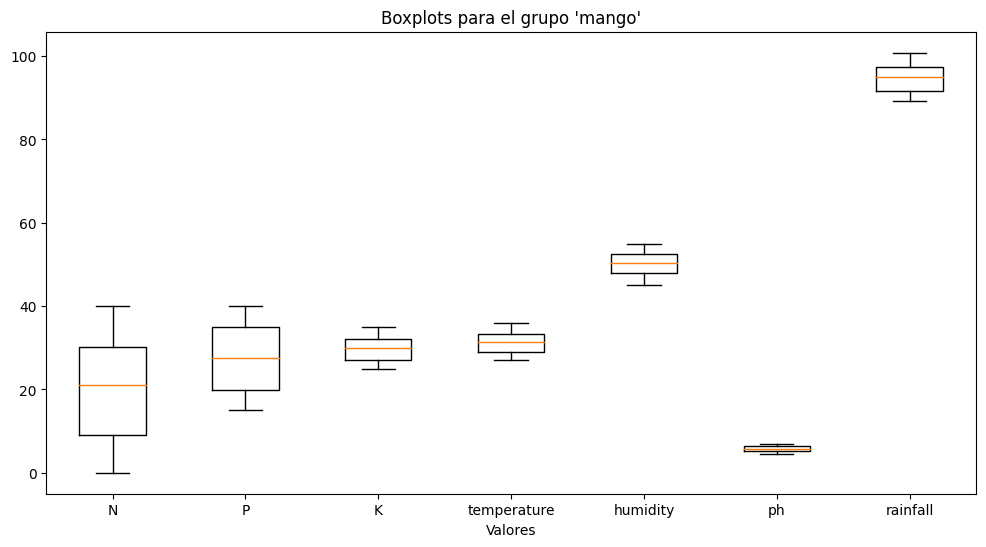

Valores atípicos para el grupo 'mothbeans':
No tiene outliers


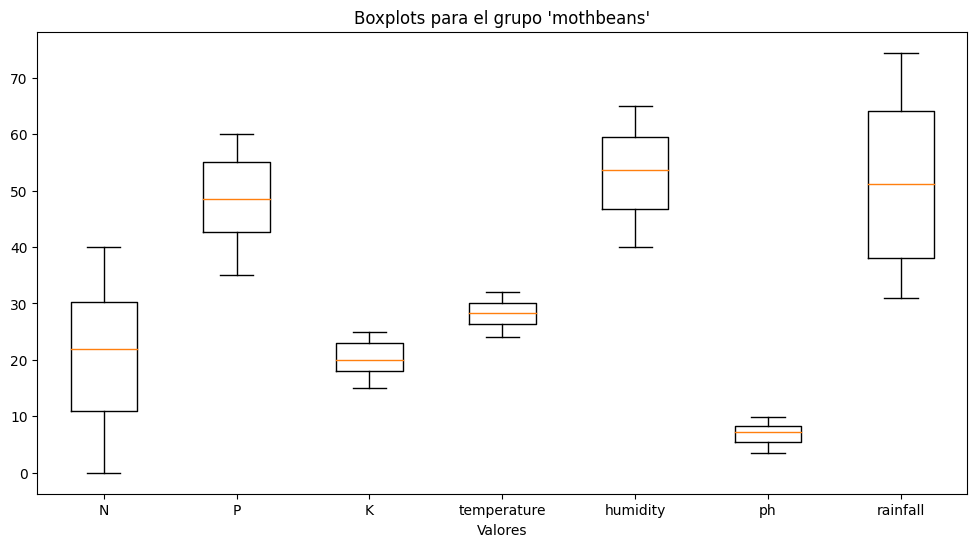

Valores atípicos para el grupo 'mungbean':
No tiene outliers


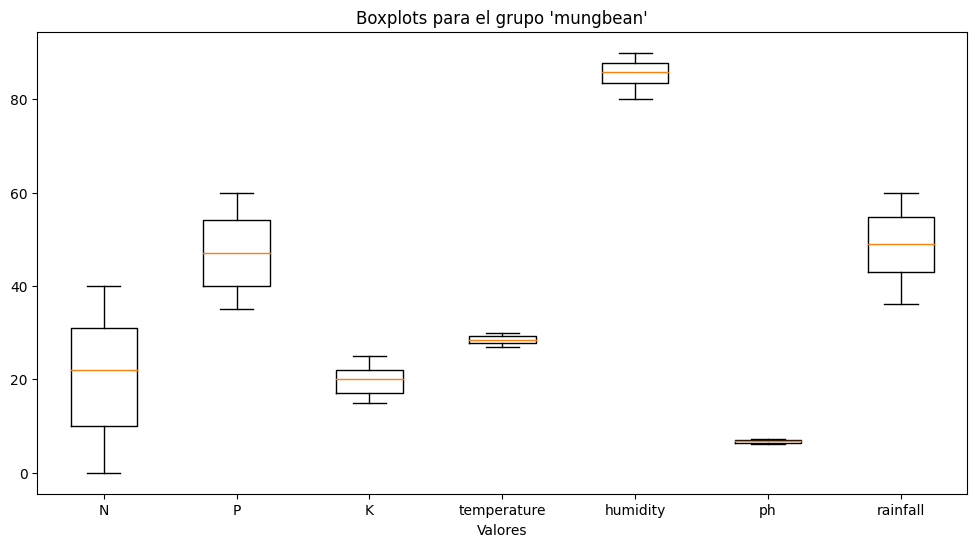

Valores atípicos para el grupo 'muskmelon':
No tiene outliers


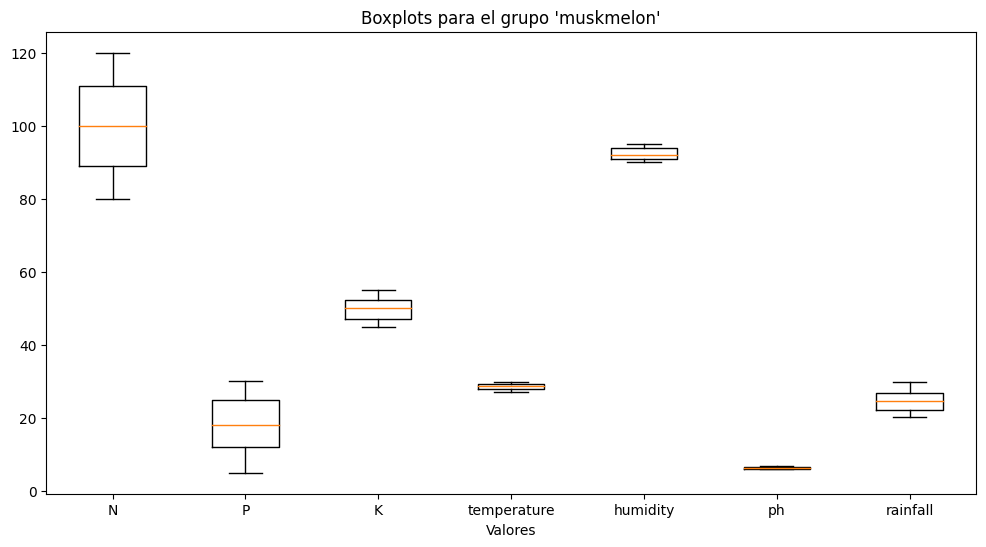

Valores atípicos para el grupo 'orange':
No tiene outliers


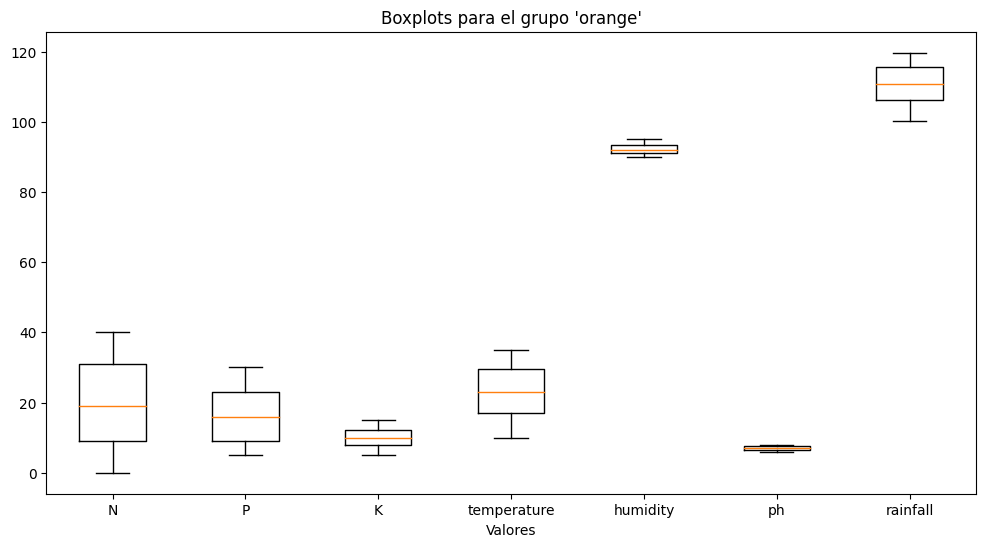

Valores atípicos para el grupo 'papaya':
No tiene outliers


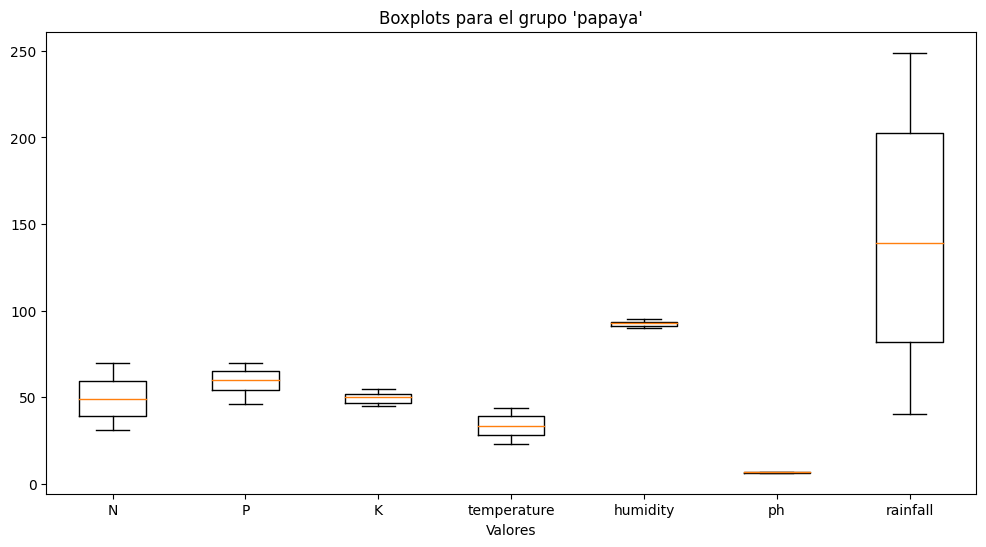

Valores atípicos para el grupo 'pigeonpeas':
No tiene outliers


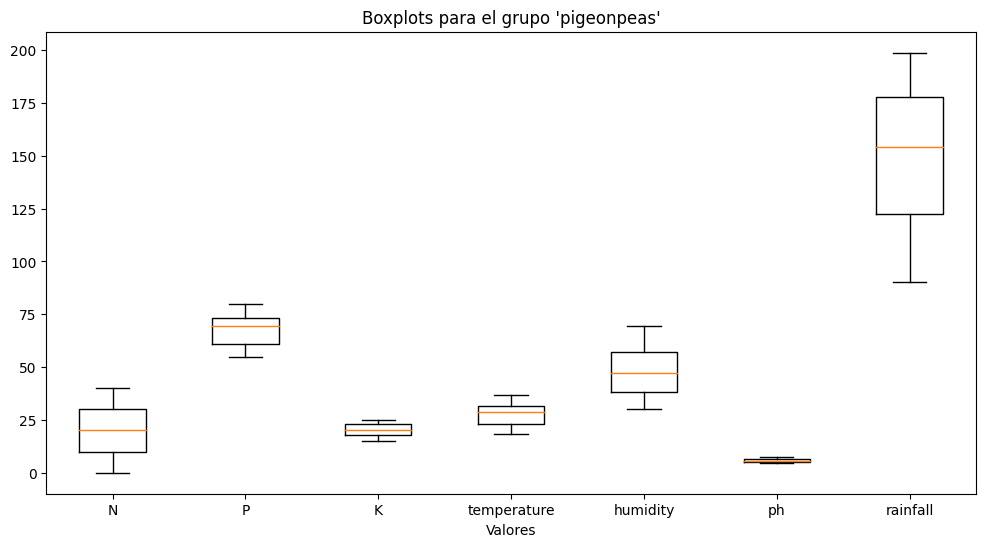

Valores atípicos para el grupo 'pomegranate':
No tiene outliers


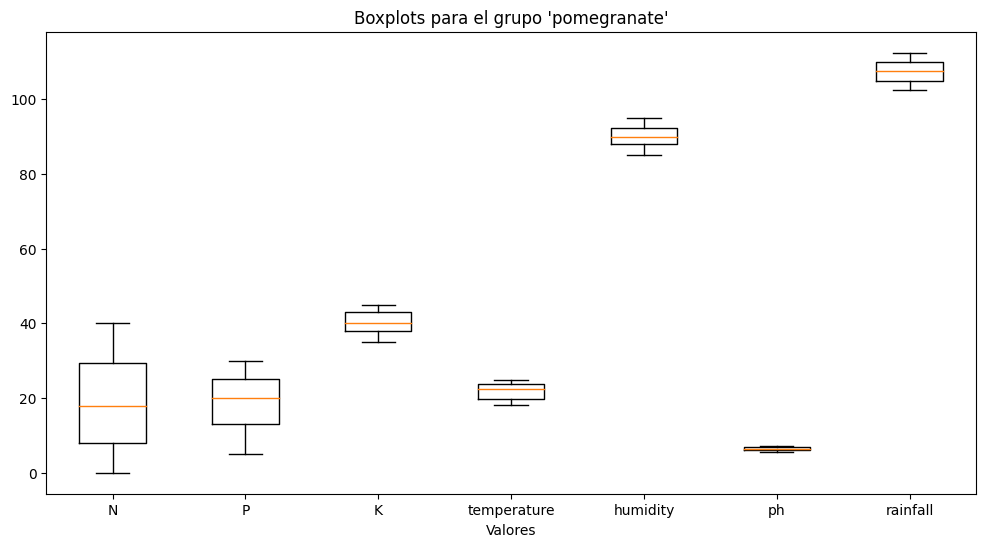

Valores atípicos para el grupo 'rice':
No tiene outliers


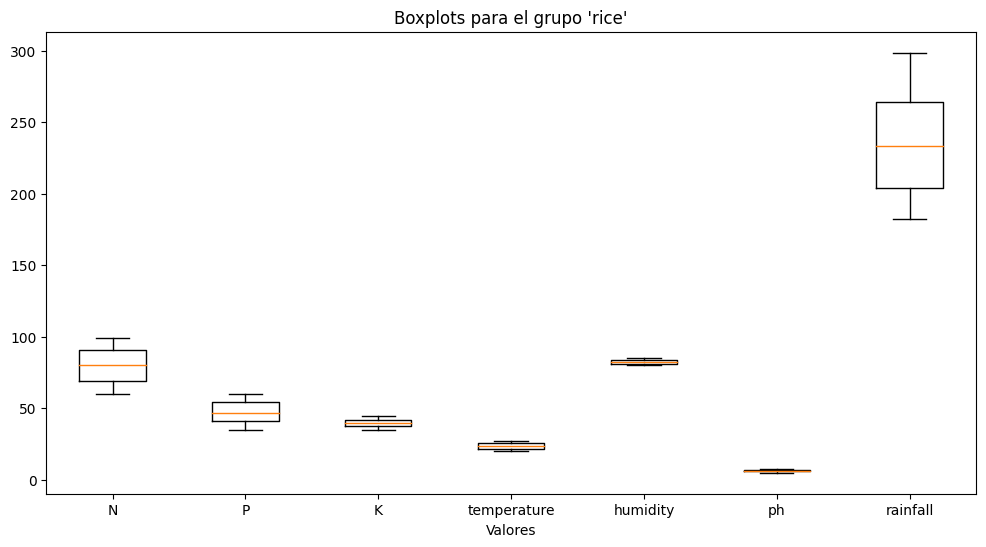

Valores atípicos para el grupo 'watermelon':
No tiene outliers


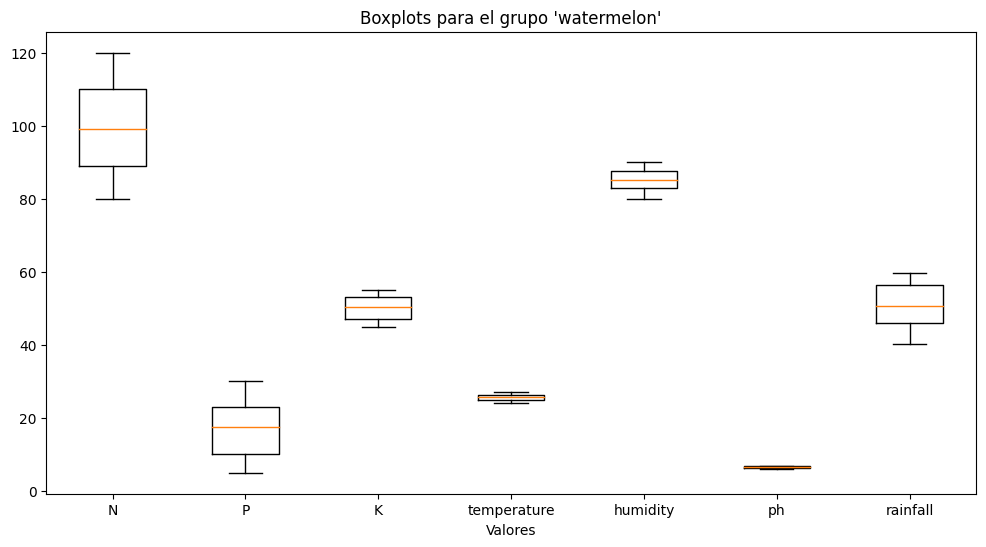

In [41]:
# 3. Identificar valores atípicos y graficar boxplots por grupo
for nombre, grupo in grupos:
    # Seleccionar solo las columnas numéricas dentro de cada grupo
    columnas_numericas = grupo.select_dtypes(include=['number'])
    
    # Calcular los valores atípicos para las columnas numéricas
    Q1 = columnas_numericas.quantile(0.25)
    Q3 = columnas_numericas.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    valores_atipicos = {}
    for col in columnas_numericas.columns:
        valores = columnas_numericas[col][(columnas_numericas[col] < limite_inferior[col]) | (columnas_numericas[col] > limite_superior[col])]
        if not valores.empty:
            valores_atipicos[col] = valores

    # Imprimir los valores atípicos o "No tiene outliers" para cada columna numérica
    print(f"Valores atípicos para el grupo '{nombre}':")
    if not valores_atipicos:
        print("No tiene outliers")
    else:
        print(valores_atipicos)
    
    # Graficar los boxplots en un solo gráfico por grupo
    plt.figure(figsize=(12, 6))
    plt.title(f"Boxplots para el grupo '{nombre}'")
    plt.boxplot(columnas_numericas.values, vert=True)
    plt.xlabel("Valores")
    plt.xticks(range(1, len(columnas_numericas.columns) + 1), columnas_numericas.columns)
    plt.show()